In [38]:


import torch
CUDA = torch.cuda.is_available()
print(CUDA)

False


In [67]:
import time
from lifelines.utils import concordance_index 
import sys
from torch import nn
import numpy as np
import pandas as pd
import network
from torch.utils.data import TensorDataset, Dataset
import torch.utils.data.dataloader as dataloader
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler


#ds = pd.read_csv('./datasets/whas500.csv',sep=',')
ds = pd.read_csv('./datasets/whas1638.csv',sep=',')


train = ds[:1310]
validation = ds[1310:]

#x = train[['age', 'gender', 'bmi', 'chf', 'miord']]
x = train[['0','1', '2', '3', '4', '5']].as_matrix()

scl = StandardScaler()

x = scl.fit_transform(x)



e = train['fstat']
t = train['lenfol']

x_valid = validation[['0','1', '2', '3', '4', '5']].as_matrix() 

x_valid = scl.transform(x_valid)

e_valid = validation['fstat']
t_valid = validation['lenfol']

x = torch.from_numpy(x).float()
e = torch.from_numpy(e.as_matrix()).float()
t = torch.from_numpy(t.as_matrix())

x_valid = torch.from_numpy(x_valid).float()
e_valid = torch.from_numpy(e_valid.as_matrix()).float()
t_valid = torch.from_numpy(t_valid.as_matrix())

In [25]:
ds

,0,1,2,3,4,5,lenfol,fstat
0,1.0,84.0,0.0,22.44662,1.0,1.0,7.589239,1
1,0.0,36.0,0.0,31.64232,0.0,1.0,1266.000000,0
2,0.0,76.0,0.0,46.48160,0.0,1.0,1453.000000,0
3,0.0,47.0,1.0,27.58821,1.0,0.0,608.000000,0
4,0.0,80.0,0.0,24.12942,1.0,0.0,22.616980,1
5,0.0,77.0,0.0,23.67519,0.0,0.0,1313.000000,0
6,0.0,90.0,1.0,27.46412,1.0,0.0,1.423138,1
7,0.0,80.0,1.0,29.26457,1.0,0.0,1567.236000,1
8,0.0,40.0,0.0,25.46070,0.0,0.0,1349.000000,0
9,0.0,54.0,1.0,24.41255,1.0,1.0,278.901600,1


In [68]:
if CUDA:
    x = x.cuda()
    e = e.cuda()
    t = t.cuda()
    x_valid = x_valid.cuda()
    e_valid = e_valid.cuda()
    t_valid = t_valid.cuda()

In [69]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight.data)
#         m.weight.data.fill_(0)
#         m.bias.data.fill_(1)

def init_weights_for_cox(m):
    if type(m) == nn.Linear:
        m.weight.data.fill_(0)
        m.bias.data.fill_(0)
        
print("starting risk set computation...")
risk_set = []
for i in range(len(t)):
    temp = []
    for j in range(len(t)):
        if t[j] >= t[i]:
            temp.append(j)
    risk_set.append(temp)
    
risk_set_validation = []
for i in range(len(t_valid)):
    temp = []
    for j in range(len(t_valid)):
        if t_valid[i]>=t_valid[j]:
            temp.append(j)
    risk_set_validation.append(temp)

print("risk set computed")

starting risk set computation...
risk set computed


In [121]:
# def elbo(risk, gated_output, E, risk_set, CUDA):
#     lgo_sm = nn.LogSoftmax(dim=1)(gated_output)
#     lnumerator = torch.mul(torch.exp(lgo_sm), risk)
    
#     lnumerator = torch.sum(lnumerator, dim=1)
    
#     expected_risks = risk + lgo_sm
#     expected_risks = torch.logsumexp(expected_risks, dim=1)
#     ldenominator = []
#     for i in range(risk.shape[0]):
#         ldenominator.append(torch.logsumexp(expected_risks[risk_set[i]], dim=0))
        
#     ldenominator = torch.stack(ldenominator, dim=0)
#    # ldenominator = torch.log(ldenominator)
    
#     likelihoods = lnumerator - ldenominator
    
#     E =  np.where(E.cpu().data.numpy()==1)[0]
    

    
# #     neg_likelihood = - torch.sum(likelihoods[E])
#     likelihoods = likelihoods[E]
#     neg_likelihood = - torch.sum(likelihoods)
    
#     return neg_likelihood

In [141]:
def elbo(risk, gated_output, E, risk_set, CUDA):
    go_sm = nn.Softmax(dim=1)(gated_output)
    lnumerator = torch.mul(go_sm, risk)
    
    lnumerator = torch.sum(lnumerator, dim=1)
    
    expected_risks = torch.exp(risk) * go_sm
    expected_risks = torch.sum(expected_risks, dim=1)
    ldenominator = []
    for i in range(risk.shape[0]):
        ldenominator.append(torch.sum(expected_risks[risk_set[i]], dim=0))
        
    ldenominator = torch.stack(ldenominator, dim=0)
    ldenominator = torch.log(ldenominator)
    
    likelihoods = lnumerator - ldenominator
    
    E =  np.where(E.cpu().data.numpy()==1)[0]
    

    
#     neg_likelihood = - torch.sum(likelihoods[E])
    likelihoods = likelihoods[E]
    neg_likelihood = - torch.sum(likelihoods)
    
    return neg_likelihood

In [142]:
def train(gated_network, betas_network, risk_set, x, e, t, CUDA, optimizer, n_epochs,x_valid,e_valid,t_valid,risk_set_validation):
    from tqdm import tqdm_notebook as tqdm
    # Initialize Metrics
    c_index = []
    train_loss = []
    valid_loss = []
    
    valid_c_index = []
    diff = 1e-4
    
    prev_loss = 0
    
    start = time.time()
    for epoch in tqdm(range(n_epochs)):

        optimizer.zero_grad()
        # print("x: ", x)
        gated_outputs = gated_network(x)
        lsoftmax = nn.LogSoftmax(dim=1)(gated_outputs)
        
        betas_output = betas_network(x)
        
        ci_train = get_concordance_index(betas_output, gated_outputs, t, e)
        c_index.append(ci_train)
        
#         loss = negative_log_likelihood(gated_outputs, betas_output, e, risk_set, CUDA)
        loss = elbo(betas_output, gated_outputs, e, risk_set, CUDA)
        
        loss.backward()
        optimizer.step()

        my_loss = loss.cpu().data.numpy()
        train_loss.append(my_loss)
        if abs(my_loss - prev_loss) < diff:
            break
        prev_loss = my_loss
        
        
        torch.cuda.empty_cache()          
        #print('Finished Training with %d iterations in %0.2fs' % (epoch + 1, time.time() - start))

        gated_outputs_valid = gated_network(x_valid)
        lsoftmax_valid = nn.LogSoftmax(dim=1)(gated_outputs_valid)
        
        betas_output_valid = betas_network(x_valid)
        
        ci_valid = get_concordance_index(betas_output_valid, gated_outputs_valid, t_valid, e_valid)
        valid_c_index.append(ci_valid)
        
#         loss = negative_log_likelihood(gated_outputs, betas_output, e, risk_set, CUDA)
        loss_valid = elbo(betas_output_valid, gated_outputs_valid, e_valid, risk_set_validation, CUDA)
        

        my_loss_valid = loss_valid.cpu().data.numpy()
        valid_loss.append(my_loss_valid)
        
        
        torch.cuda.empty_cache()          
        #print('Finished Training with %d iterations in %0.2fs' % (epoch + 1, time.time() - start))
     
        
    metrics = {}
    metrics['train_loss'] = train_loss
    metrics['c-index'] = c_index
    metrics['valid_loss'] = valid_loss
    metrics['c-index-valid'] = valid_c_index
    return metrics


In [143]:
def negative_log_likelihood(risk, lsoftmax, E, risk_set, CUDA):
    
    import numpy as np
    
#     new_risk = []
#     for i in range(len(risk_set)):
#         new_risk.append(risk[risk_set[i]])
        
#     log_risk = []
#     for i in range(len(new_risk)):
#         temp = torch.logsumexp(new_risk[i], 0)
#         log_risk.append(temp)

    lnumerator = risk
    
    idxs = range(risk.shape[0])
    
    
    ldenominator = []
    
    for i in range(len(idxs)):
        ldenominator.append(torch.logsumexp(risk[risk_set[i]], dim=0))
            
                            
    ldenominator = torch.stack(ldenominator, dim=0)
    print(ldenominator.shape)
#     print(lnumerator.shape)
    
    
    likelihoods = lnumerator - ldenominator
    print(likelihoods.shape)
    
    E =  np.where(E.cpu().data.numpy()==1)[0]
    

    
#     neg_likelihood = - torch.sum(likelihoods[E])
    likelihoods = likelihoods[E] + lsoftmax[E]
    likelihoods = torch.logsumexp(likelihoods, dim=1)
    neg_likelihood = - torch.sum(likelihoods)

    return neg_likelihood


In [144]:
def get_concordance_index(x, gated_x, t, e, **kwargs):
#     x = x.detach().cpu().numpy()
    t = t.detach().cpu().numpy()
    e = e.detach().cpu().numpy()
    softmax = torch.nn.Softmax(dim=1)(gated_x)
    computed_hazard = torch.exp(x)

    computed_hazard = torch.mul(softmax, computed_hazard)
    computed_hazard = torch.sum(computed_hazard, dim = 1)
    return concordance_index(t,-1*computed_hazard.detach().cpu().numpy(),e)


In [166]:
n_in = x.shape[1]
k = 2

betas_network = nn.Sequential(nn.Linear(n_in, 1, bias=True))

layers_sizes = [n_in, k]
# Construct Neural Network
layers = []
for i in range(len(layers_sizes)-2):
    layers.append(nn.Linear(layers_sizes[i],layers_sizes[i+1]))
    layers.append(nn.ELU())

layers.append(nn.Linear(layers_sizes[-2], layers_sizes[-1]))
gated_network = nn.Sequential(*layers)
#my_network.apply(init_weights)

#optimizer = optimizer = torch.optim.SGD(my_network.parameters(), lr=learning_rate, momentum=momentum, weight_decay=L2_reg, nesterov=True)
optimizer = torch.optim.Adam(list(gated_network.parameters()) + list(betas_network.parameters()), lr=1e-3, weight_decay=0.01)
betas_network.train()
gated_network.train()

if CUDA:
    gated_network.cuda()
    betas_network.cuda()

# If you have validation data, you can add it as the valid_dataloader parameter to the function
n_epochs = 2000
metrics = train(gated_network, betas_network, risk_set, x, e, t, CUDA, optimizer, n_epochs,x_valid,e_valid,t_valid,risk_set_validation)
print() 

print("Done")

HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

()
Done


In [163]:
print(metrics['c-index'][-1])
print(metrics['c-index-valid'][-1])

0.8213576253509148
0.817284033840035


In [164]:
print(metrics['train_loss'])
print(metrics['c-index'])
print(metrics['c-index-valid'])


[array(3462.3484, dtype=float32), array(3461.1199, dtype=float32), array(3459.8962, dtype=float32), array(3458.6797, dtype=float32), array(3457.469, dtype=float32), array(3456.2642, dtype=float32), array(3455.065, dtype=float32), array(3453.8726, dtype=float32), array(3452.686, dtype=float32), array(3451.5056, dtype=float32), array(3450.3313, dtype=float32), array(3449.1648, dtype=float32), array(3448.004, dtype=float32), array(3446.8499, dtype=float32), array(3445.7026, dtype=float32), array(3444.562, dtype=float32), array(3443.4285, dtype=float32), array(3442.3018, dtype=float32), array(3441.1807, dtype=float32), array(3440.0693, dtype=float32), array(3438.9626, dtype=float32), array(3437.8638, dtype=float32), array(3436.7727, dtype=float32), array(3435.688, dtype=float32), array(3434.6094, dtype=float32), array(3433.5398, dtype=float32), array(3432.4763, dtype=float32), array(3431.421, dtype=float32), array(3430.372, dtype=float32), array(3429.331, dtype=float32), array(3428.2976, d

('num of epochs: ', 951)


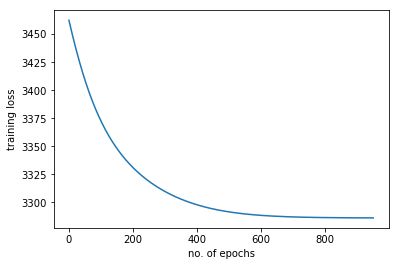

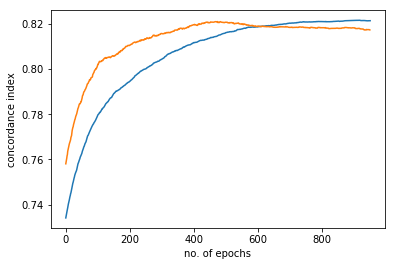

In [165]:
# Print the final metrics
# print('Train C-Index:', metrics['c-index'])
# print('Valid C-Index: ',metrics['valid_c-index'][-1])

print("num of epochs: ", len(metrics['train_loss']))
# print(metrics['train_loss'])
# Plot the training / validation curves
plt.plot(range(len(metrics['train_loss'])), metrics['train_loss'])
plt.xlabel('no. of epochs')
plt.ylabel('training loss')
plt.show()

plt.plot(range(len(metrics['c-index'])), metrics['c-index'])
plt.plot(range(len(metrics['c-index-valid'])), metrics['c-index-valid'])

plt.xlabel('no. of epochs')
plt.ylabel('concordance index')
# plt.plot(range(len(metrics['c-index'])), metrics['c-index'])
plt.show()

In [53]:
from lifelines import CoxPHFitter


In [55]:
ds

,0,1,2,3,4,5,lenfol,fstat
0,1.0,84.0,0.0,22.44662,1.0,1.0,7.589239,1
1,0.0,36.0,0.0,31.64232,0.0,1.0,1266.000000,0
2,0.0,76.0,0.0,46.48160,0.0,1.0,1453.000000,0
3,0.0,47.0,1.0,27.58821,1.0,0.0,608.000000,0
4,0.0,80.0,0.0,24.12942,1.0,0.0,22.616980,1
5,0.0,77.0,0.0,23.67519,0.0,0.0,1313.000000,0
6,0.0,90.0,1.0,27.46412,1.0,0.0,1.423138,1
7,0.0,80.0,1.0,29.26457,1.0,0.0,1567.236000,1
8,0.0,40.0,0.0,25.46070,0.0,0.0,1349.000000,0
9,0.0,54.0,1.0,24.41255,1.0,1.0,278.901600,1


In [56]:
CoxPHFitter().fit(ds.iloc[], 'lenfol', 'fstat')

/home/cnagpal/anaconda2/lib/python2.7/site-packages/lifelines/utils/__init__.py:900: ConvergenceWarning: Column 0 have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:
>>> events = df['fstat'].astype(bool)
>>> df.loc[events, '0'].var()
>>> df.loc[~events, '0'].var()

Too low variance here means that the column 0 completely determines whether a subject dies or not.
See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression 
  warnings.warn(warning_text, ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 1638 observations, 948 censored>

In [60]:
events = ds['fstat'].astype(bool)
ds.loc[events, '0'].var()
ds.loc[~events, '0'].var()



0.0